# Decision Tree Classifier on Iris Dataset
**Project:** Decision Tree classifier for Iris flowers  
**Author:** (zohoor awaji)  
**Date:** (2025/8/11)  

**Description:**  
This notebook trains a Decision Tree classifier on the Iris dataset (setosa, versicolor, virginica) using scikit-learn, evaluates performance and visualizes the tree.


In [72]:
# !pip install -q scikit-learn joblib matplotlib

# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# scikit-learn
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# Save/load model
import joblib

# For inline plots in Colab
%matplotlib inline


In [73]:
iris = load_iris()
X = iris.data
y = iris.target

# Put into a DataFrame for easy viewing
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
df['species'] = [iris.target_names[i] for i in y]

# Show top rows and summary stats
display(df.head())
display(df.describe())
print("Class distribution:")
print(df['species'].value_counts())


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Class distribution:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [74]:
# Use stratify to preserve class proportions in train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (105, 4)
Test size: (45, 4)


In [75]:
# Use stratify to preserve class proportions in train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (105, 4)
Test size: (45, 4)


In [76]:
# Create and train the model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

print("Model trained.")


Model trained.


Accuracy: 0.9333

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.80      0.89        15
   virginica       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



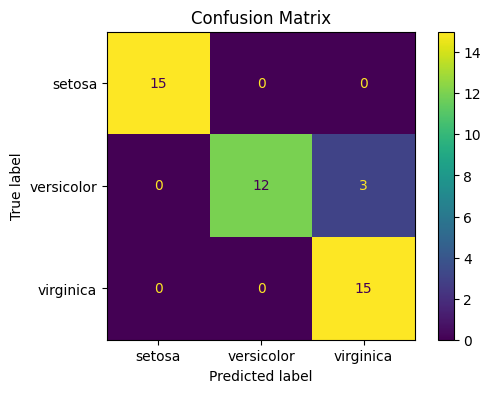

In [77]:
# Predict on the test set
y_pred = model.predict(X_test)

# Metrics
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}\n")
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Confusion matrix (and plot)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
fig, ax = plt.subplots(figsize=(6,4))
disp.plot(ax=ax)
plt.title("Confusion Matrix")
plt.show()


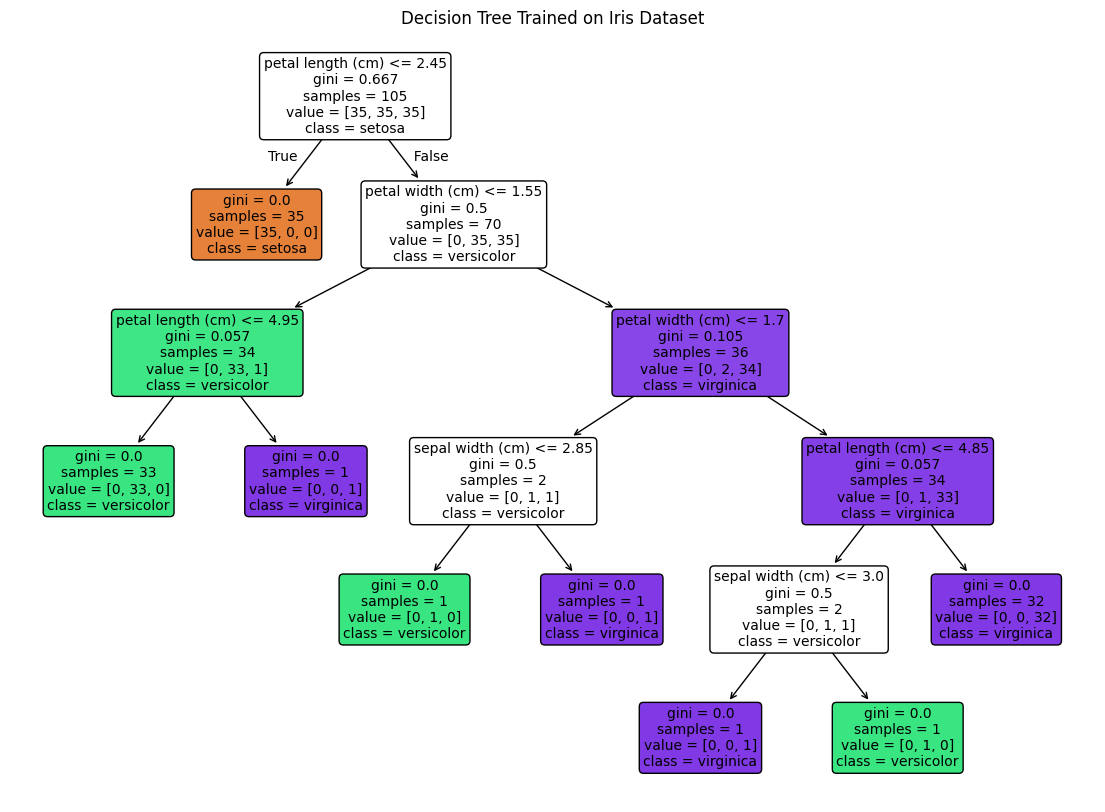

Saved decision_tree_iris.png


<Figure size 640x480 with 0 Axes>

In [78]:
plt.figure(figsize=(14,10))
plot_tree(model,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Trained on Iris Dataset")
plt.show()

# Save the figure if you want a PNG file
plt.savefig("decision_tree_iris.png", dpi=200, bbox_inches='tight')
print("Saved decision_tree_iris.png")


## Summary & Next Steps

- Model: DecisionTreeClassifier (default)
- Accuracy: (as shown earlier)
- Next improvements to try:
  - Tune hyperparameters (max_depth, min_samples_split)
  - Try criterion='entropy' or 'gini'
  - Prune the tree or use RandomForest
  - Add cross-validation and GridSearchCV
